In [1]:
import pandas as pd
from pymongo import MongoClient

# Connect to MongoDB and fetch the data
client = MongoClient('mongodb://localhost:27017/')
db = client['survey_data']
collection = db['user_data']

# Load the data into a pandas DataFrame
data = pd.DataFrame(list(collection.find()))

# View the first few rows to understand the structure
data.head(20)


,_id,age,gender,income,expenses
0,673d174c3fbce6efc5a1999a,21,Female,210000000,"{'utilities': '200000', 'entertainment': '', '..."
1,673e270297d40ae8afda00ff,23,Female,80000000,"{'utilities': '', 'entertainment': '100000', '..."
2,673e278697d40ae8afda0100,23,Male,80000000,"{'utilities': '1000000', 'entertainment': '900..."
3,673e279697d40ae8afda0101,21,Female,210000000,"{'utilities': '200000', 'entertainment': '', '..."
4,673e284dd9532d4f56daf55e,24,Male,90000000,"{'utilities': '200000', 'entertainment': '', '..."
5,673e2d89849c8b26109bbb05,23,Male,3400000,"{'utilities': '1000', 'entertainment': '', 'sc..."
6,673e2d97849c8b26109bbb06,23,Male,3400000,"{'utilities': '1050', 'entertainment': '3000',..."
7,673e492c849c8b26109bbb07,33,Male,38000000,"{'utilities': '1050', 'entertainment': '3000',..."
8,673e4937849c8b26109bbb08,33,Male,38000000,"{'utilities': '1050', 'entertainment': '3000',..."
9,673e49965adce728ae72329d,33,Male,45000000,"{'utilities': '45000', 'entertainment': '', 's..."


In [5]:
data['income'] = pd.to_numeric(data['income'], errors='coerce')

# Drop rows where 'income' is NaN (optional, depends on how you want to handle missing data)
data.dropna(subset=['income'], inplace=True)

# Now sort the data by 'income'
top_income_ages = data.sort_values(by='income', ascending=False).head(10)

# Check the cleaned data
data.head()

,_id,age,gender,income,expenses
0,673d174c3fbce6efc5a1999a,21,Female,210000000.0,"{'utilities': '200000', 'entertainment': '', '..."
1,673e270297d40ae8afda00ff,23,Female,80000000.0,"{'utilities': '', 'entertainment': '100000', '..."
2,673e278697d40ae8afda0100,23,Male,80000000.0,"{'utilities': '1000000', 'entertainment': '900..."
3,673e279697d40ae8afda0101,21,Female,210000000.0,"{'utilities': '200000', 'entertainment': '', '..."
4,673e284dd9532d4f56daf55e,24,Male,90000000.0,"{'utilities': '200000', 'entertainment': '', '..."


In [13]:
# If 'expenses' is a dictionary, flatten it into separate columns
expenses_df = pd.json_normalize(data['expenses'])

# Concatenate the flattened expenses columns back into the original DataFrame
data = pd.concat([data.drop(columns=['expenses']), expenses_df], axis=1)

# Check the updated DataFrame
data.head(20)


,_id,age,gender,income,utilities,entertainment,school_fees,shopping,healthcare
0,673d174c3fbce6efc5a1999a,21,Female,210000000.0,200000,,,,
1,673e270297d40ae8afda00ff,23,Female,80000000.0,,100000,,,
2,673e278697d40ae8afda0100,23,Male,80000000.0,1000000,90000,,,
3,673e279697d40ae8afda0101,21,Female,210000000.0,200000,,,,
4,673e284dd9532d4f56daf55e,24,Male,90000000.0,200000,,,,
5,673e2d89849c8b26109bbb05,23,Male,3400000.0,1000,,,,
6,673e2d97849c8b26109bbb06,23,Male,3400000.0,1050,3000,,,
7,673e492c849c8b26109bbb07,33,Male,38000000.0,1050,3000,200000,,70000
8,673e4937849c8b26109bbb08,33,Male,38000000.0,1050,3000,200000,,70000
9,673e49965adce728ae72329d,33,Male,45000000.0,45000,,,100000,250000


In [23]:
import numpy as np
import pandas as pd

# Define the spending categories (expenses columns)
spending_categories = ['utilities', 'healthcare', 'entertainment', 'shopping', 'school_fees']

# Convert the expenses columns to numeric, coercing errors to NaN
for category in spending_categories:
    data[category] = pd.to_numeric(data[category], errors='coerce')

# Fill missing values with random integers between 25000 and 55000, divisible by 10
for category in spending_categories:
    # Generate random integers between 2500 and 5500 (scaled by 10) and multiply by 10
    random_values = np.random.randint(2500, 5501, size=data[category].isna().sum()) * 10
    
    # Fill missing values with the generated random numbers
    data[category] = data[category].fillna(pd.Series(random_values, index=data[data[category].isna()].index))

# Check if there are any missing values left
print(data.isnull().sum())

# Verify that the values are filled correctly
print(data[spending_categories].head())


_id              0
age              0
gender           0
income           0
utilities        0
entertainment    0
school_fees      0
shopping         0
healthcare       0
dtype: int64
   utilities  healthcare  entertainment  shopping  school_fees
0   200000.0     50660.0        45440.0   49850.0      28490.0
1    34250.0     37100.0       100000.0   46910.0      25530.0
2  1000000.0     51760.0        90000.0   36110.0      27200.0
3   200000.0     50510.0        27700.0   50230.0      41220.0
4   200000.0     37910.0        36910.0   44330.0      38680.0


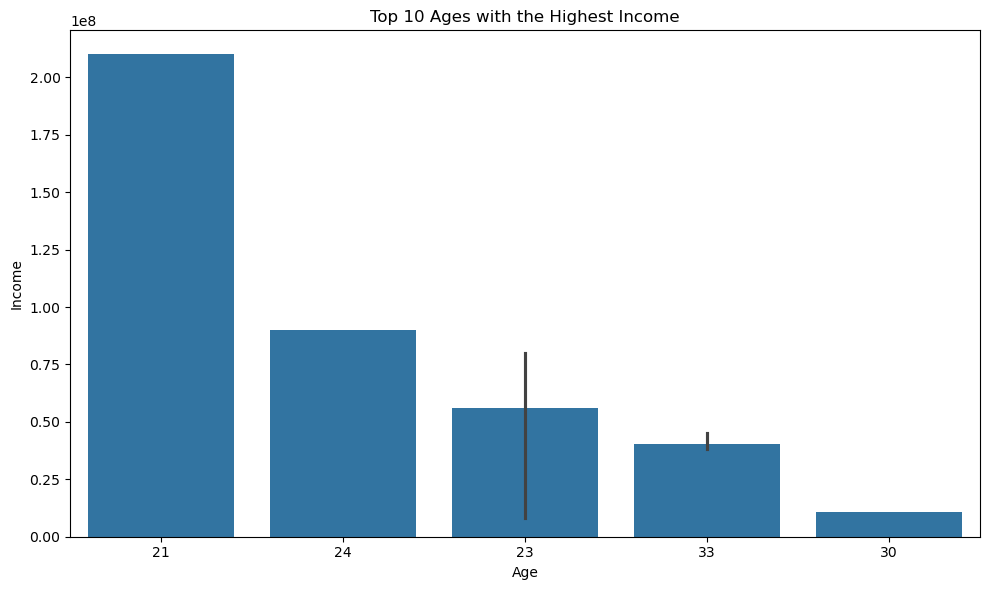

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the data by income and select the top 10 highest income ages
top_income_ages = data.sort_values(by='income', ascending=False).head(10)

# Plot the top 10 highest income ages
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='income', data=top_income_ages)
plt.title('Top 10 Ages with the Highest Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.tight_layout()

# Show the plot
plt.show()

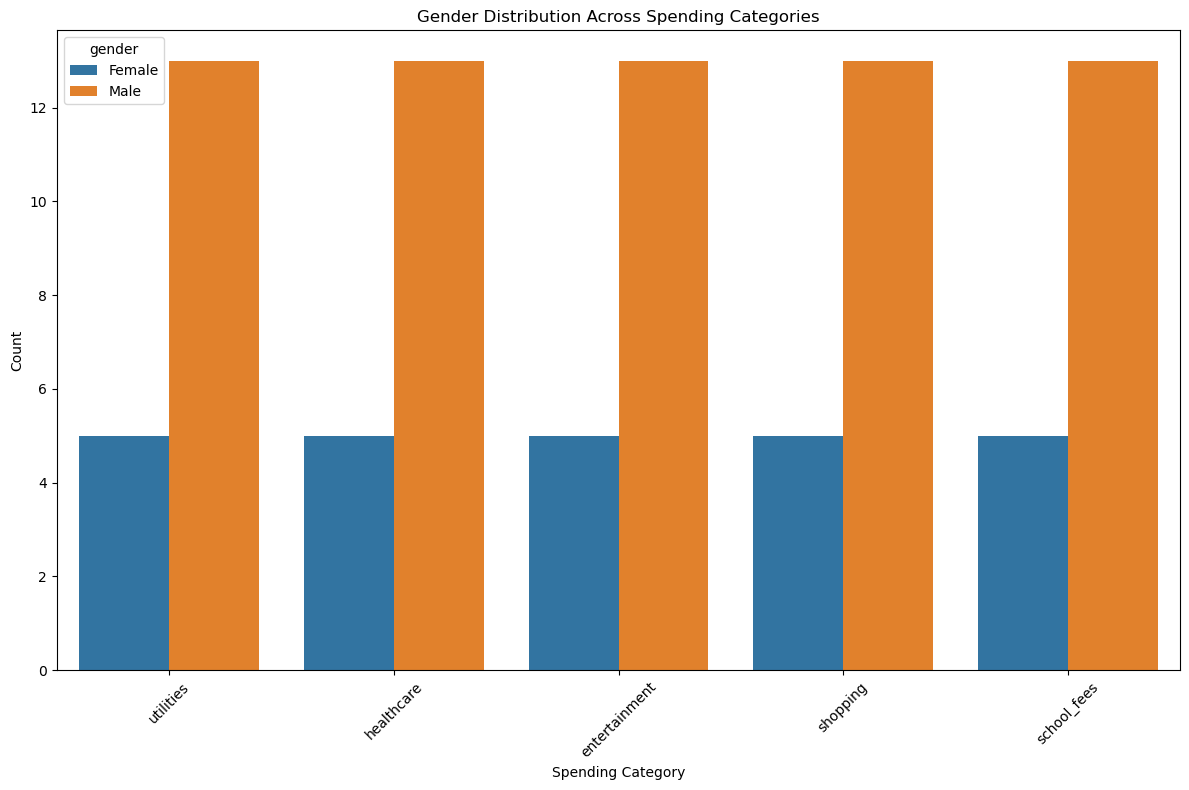

In [33]:
# Melt the data to create a gender-spending category relationship
spending_categories = ['utilities', 'healthcare', 'entertainment', 'shopping', 'school_fees']
melted_data = data.melt(id_vars=['gender'], value_vars=spending_categories, var_name='spending_category', value_name='amount')

# Plot gender distribution across spending categories
plt.figure(figsize=(12, 8))
sns.countplot(x='spending_category', hue='gender', data=melted_data)
plt.title('Gender Distribution Across Spending Categories')
plt.xlabel('Spending Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Charts saved as images.


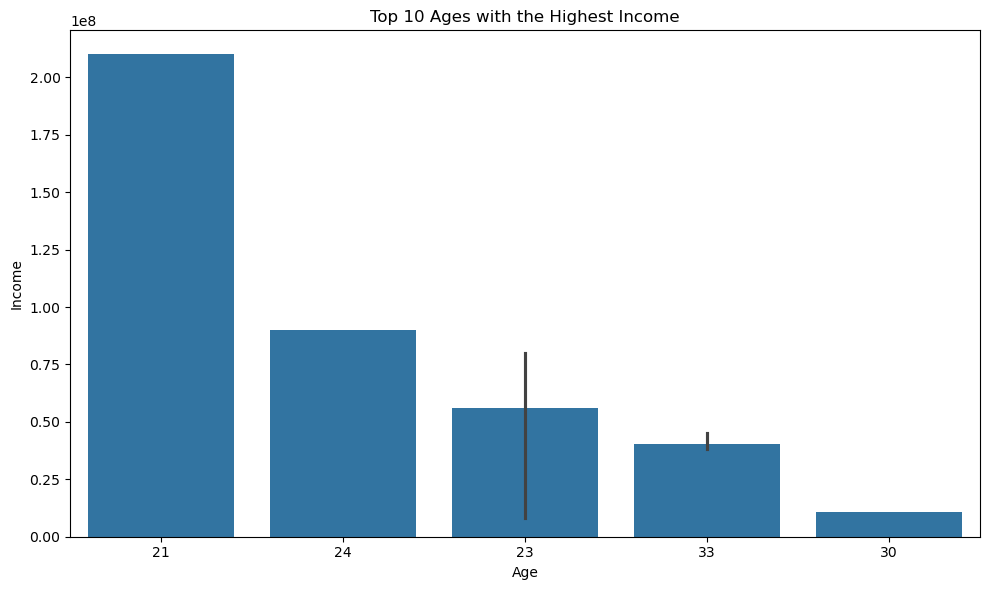

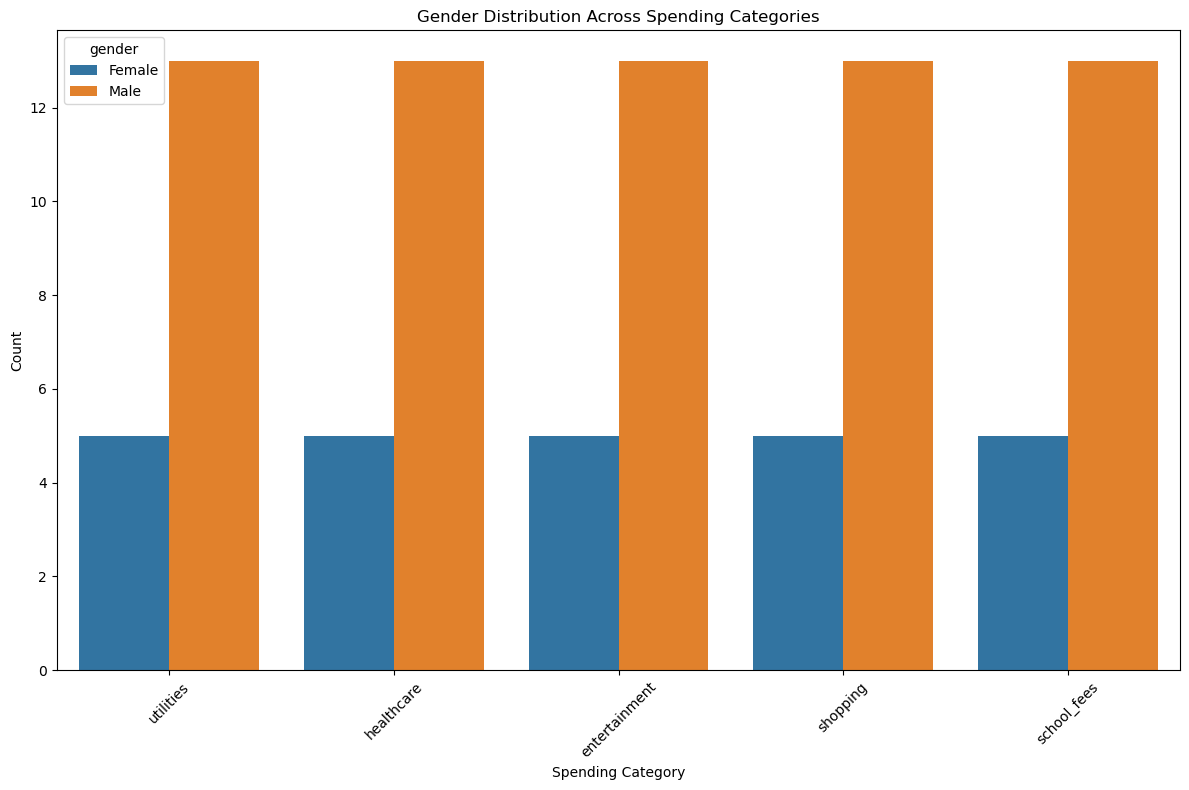

In [37]:
# Save the charts to PNG files
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='income', data=top_income_ages)
plt.title('Top 10 Ages with the Highest Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.tight_layout()
plt.savefig('top_income_ages.png')

# Gender distribution chart
plt.figure(figsize=(12, 8))
sns.countplot(x='spending_category', hue='gender', data=melted_data)
plt.title('Gender Distribution Across Spending Categories')
plt.xlabel('Spending Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('gender_spending_distribution.png')

print("Charts saved as images.")
